In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

> # EDA: Training Set Variable Distributions
> April 30, 2019

In [2]:
SPL_SEQ_DICT = {"emojis": [":)", ":-)", ":(", ":-(", ":-/", ":/", "-_-", ":|", 
                            ":-|"],
                "proper nouns": ["republican", "democrat", "trump", "clinton", "hillary"]}

In [69]:
# Load training set
train = pd.read_csv(os.path.join("", "train.csv"))

In [151]:
train.head(5)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,fem_bool,tar_bool,muslim_bool,christian_bool,jewish_bool,male_bool,transgender_bool,likes_bool,caps_ratio_bool,excl_ratio_bool
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0


In [155]:
# Percentage of nulls per column
train.isnull().sum()*100/len(train)

id                                      0.000000
target                                  0.000000
comment_text                            0.000000
severe_toxicity                         0.000000
obscene                                 0.000000
identity_attack                         0.000000
insult                                  0.000000
threat                                  0.000000
asian                                  77.553558
atheist                                77.553558
bisexual                               77.553558
black                                  77.553558
buddhist                               77.553558
christian                              77.553558
female                                 77.553558
heterosexual                           77.553558
hindu                                  77.553558
homosexual_gay_or_lesbian              77.553558
intellectual_or_learning_disability    77.553558
jewish                                 77.553558
latino              

## I. Text Characteristics

In [ ]:
# Generate new comment traits

train['total_length'] = train['comment_text'].apply(len)
train['capitals'] = train['comment_text'].apply(lambda comment: \
                               sum(1 for c in comment if c.isupper()))
train['caps_ratio'] = train.apply(lambda row: \
                      float(row['capitals'])/float(row['total_length']),axis=1)
train['num_exclamation_marks'] = train['comment_text'].apply(lambda \
                                                             comment: comment.count('!'))
train['excl_ratio'] = train.apply(lambda row: \
                      float(row['num_exclamation_marks'])/float(row['total_length']),axis=1)
train['num_question_marks'] = train['comment_text'].apply(lambda comment: comment.count('?'))

train['quest_ratio'] = train.apply(lambda row: \
                      float(row['num_question_marks'])/float(row['total_length']),axis=1)
train['num_punctuation'] = train['comment_text'].apply(lambda \
                                            comment: sum(comment.count(w) for w in '.,;:'))

train['punct_ratio'] = train.apply(lambda row: \
                      float(row['num_punctuation'])/float(row['total_length']),axis=1)
train['num_symbols'] = train['comment_text'].apply(lambda comment:\
                sum(comment.count(w) for w in '*&$%'))
train['symb_ratio'] = train.apply(lambda row: \
                      float(row['num_symbols'])/float(row['total_length']),axis=1)
train['num_words'] = train['comment_text'].apply(lambda comment: len(comment.split()))
train['num_unique_words'] = train['comment_text'].apply(lambda comment: len(set(w for w in comment.split())))
train['unique_ratio'] = train['num_unique_words'] / train['num_words']
train['num_smilies'] = train['comment_text'].apply(lambda comment: \
                           sum(comment.count(w) for w in SPL_SEQ_DICT["emojis"] ))
train['prop_nouns_num'] = train['comment_text'].apply(lambda comment: \
               sum(comment.lower().count(w) for w in SPL_SEQ_DICT["proper nouns"] ))

In [131]:
# Plotting functions
thresh_tox = 0.75

def feat_dens_by_label(train, metric, thresh, feat, title):
    train[metric+'_bool'] = train[metric].apply(lambda x: 1 if x > thresh  else 0)
    train.groupby(metric+'_bool')[feat].plot.kde(bw_method=0.3)
    plt.legend()
    plt.title(title)
def tox_dens_by_feat(train, tox_metric, feat, title):
    m, std = train[feat].mean(), train[feat].std()
    thresh = m + (3*std)
    train[feat+'_bool'] = train[feat].apply(lambda x: 1 if x > thresh  else 0)
    train.groupby(feat+'_bool')[tox_metric].plot.kde(bw_method=0.3)
    plt.legend()
    plt.title(title)
def mean_bars(train, feats, title):
    df_av = train.groupby('toxic_bool')[feats[0]].mean().to_frame()
    for i in range(1, len(feats)):
        df_av[feats[i]] = train.groupby('toxic_bool')[feats[i]].mean()
    df_av.plot.bar()
    plt.title(title)

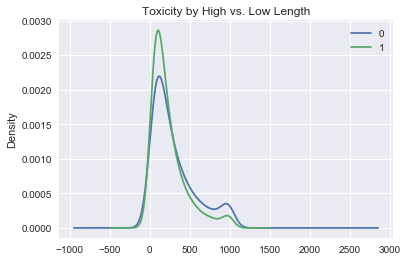

In [132]:
tox_dens_by_feat(train, 'total_length', 'target', 'Toxicity by High vs. Low Length')

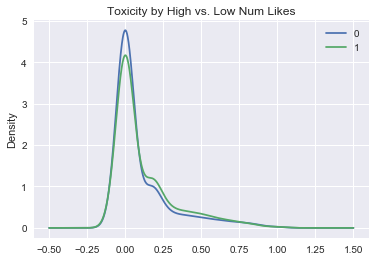

In [133]:
tox_dens_by_feat(train, 'target', 'likes', 'Toxicity by High vs. Low Num Likes')

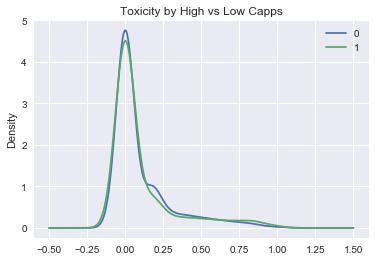

In [134]:
tox_dens_by_feat(train, 'target', 'caps_ratio', 'Toxicity by High vs Low Capps')

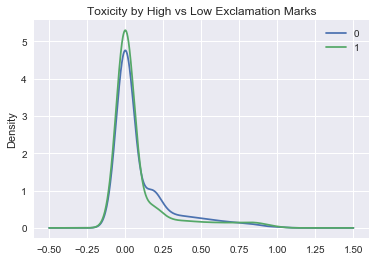

In [135]:
tox_dens_by_feat(train, 'target', 'excl_ratio', 'Toxicity by High vs Low Exclamation Marks')

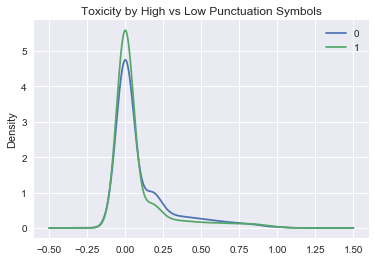

In [156]:
tox_dens_by_feat(train, 'target', 'punct_ratio', 'Toxicity by High vs Low Punctuation Symbols')

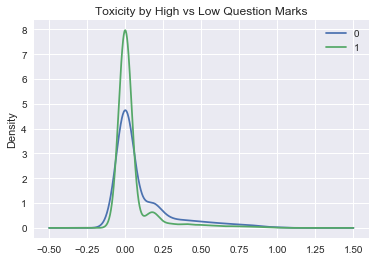

In [157]:
tox_dens_by_feat(train, 'target', 'quest_ratio', 'Toxicity by High vs Low Question Marks')

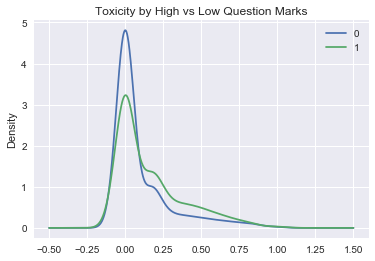

In [161]:
tox_dens_by_feat(train, 'target', 'prop_nouns_num', 'Toxicity by High vs Low Question Marks')

## II. Toxicity Metrics and Idenities: Conditional Distributions

### 1. Toxicity and Gender

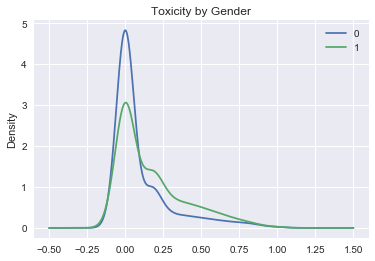

In [101]:
feat_dens_by_label(train, 'target', 0.5, 'female',
              'Prob. Female label: Toxic vs. Non-Toxic')

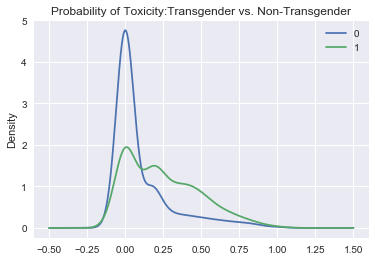

In [108]:
feat_dens_by_label(train, 'target', 0.5, 'transgender', 'Prob. \
Transgender label: vs. Toxic vs. Non-Toxic' )

### 2. Identity Attack and Religion

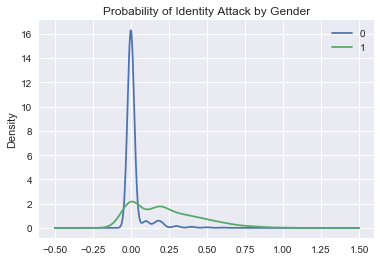

In [102]:
dens_by_label(train, 'identity_attack', 0.5, 'muslim',
              "Probability of Identity Attack by Religion"  )

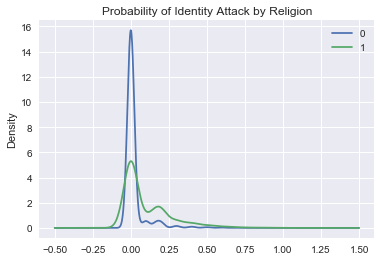

In [103]:
feat_dens_by_label(train, 'identity_attack', 0.5, 'christian',
              "Probability of Identity Attack by Religion"  )

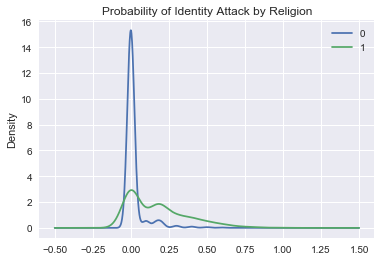

In [104]:
feat_dens_by_label(train, 'identity_attack', 0.5, 'jewish',
              "Probability of Identity Attack by Religion"  )

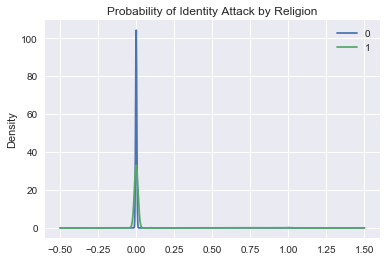

In [109]:
feat_dens_by_label(train, 'identity_attack', 0.5, 'atheist',
              "Probability of Identity Attack by Religion: Atheist vs. Non-Atheist"  )

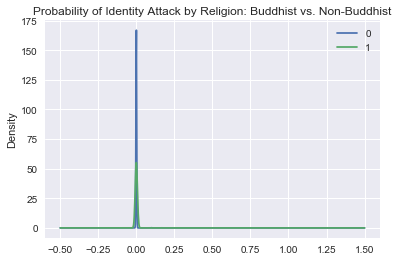

In [111]:
feat_dens_by_label(train, 'identity_attack', 0.5, 'buddhist',
              "Probability of Identity Attack by Religion: Buddhist vs. Non-Buddhist"  )

### 3. Weighted %:  Toxic comments & different identities:


Percentage of toxic comments related to different identities, using target and population amount of each identity as weights:

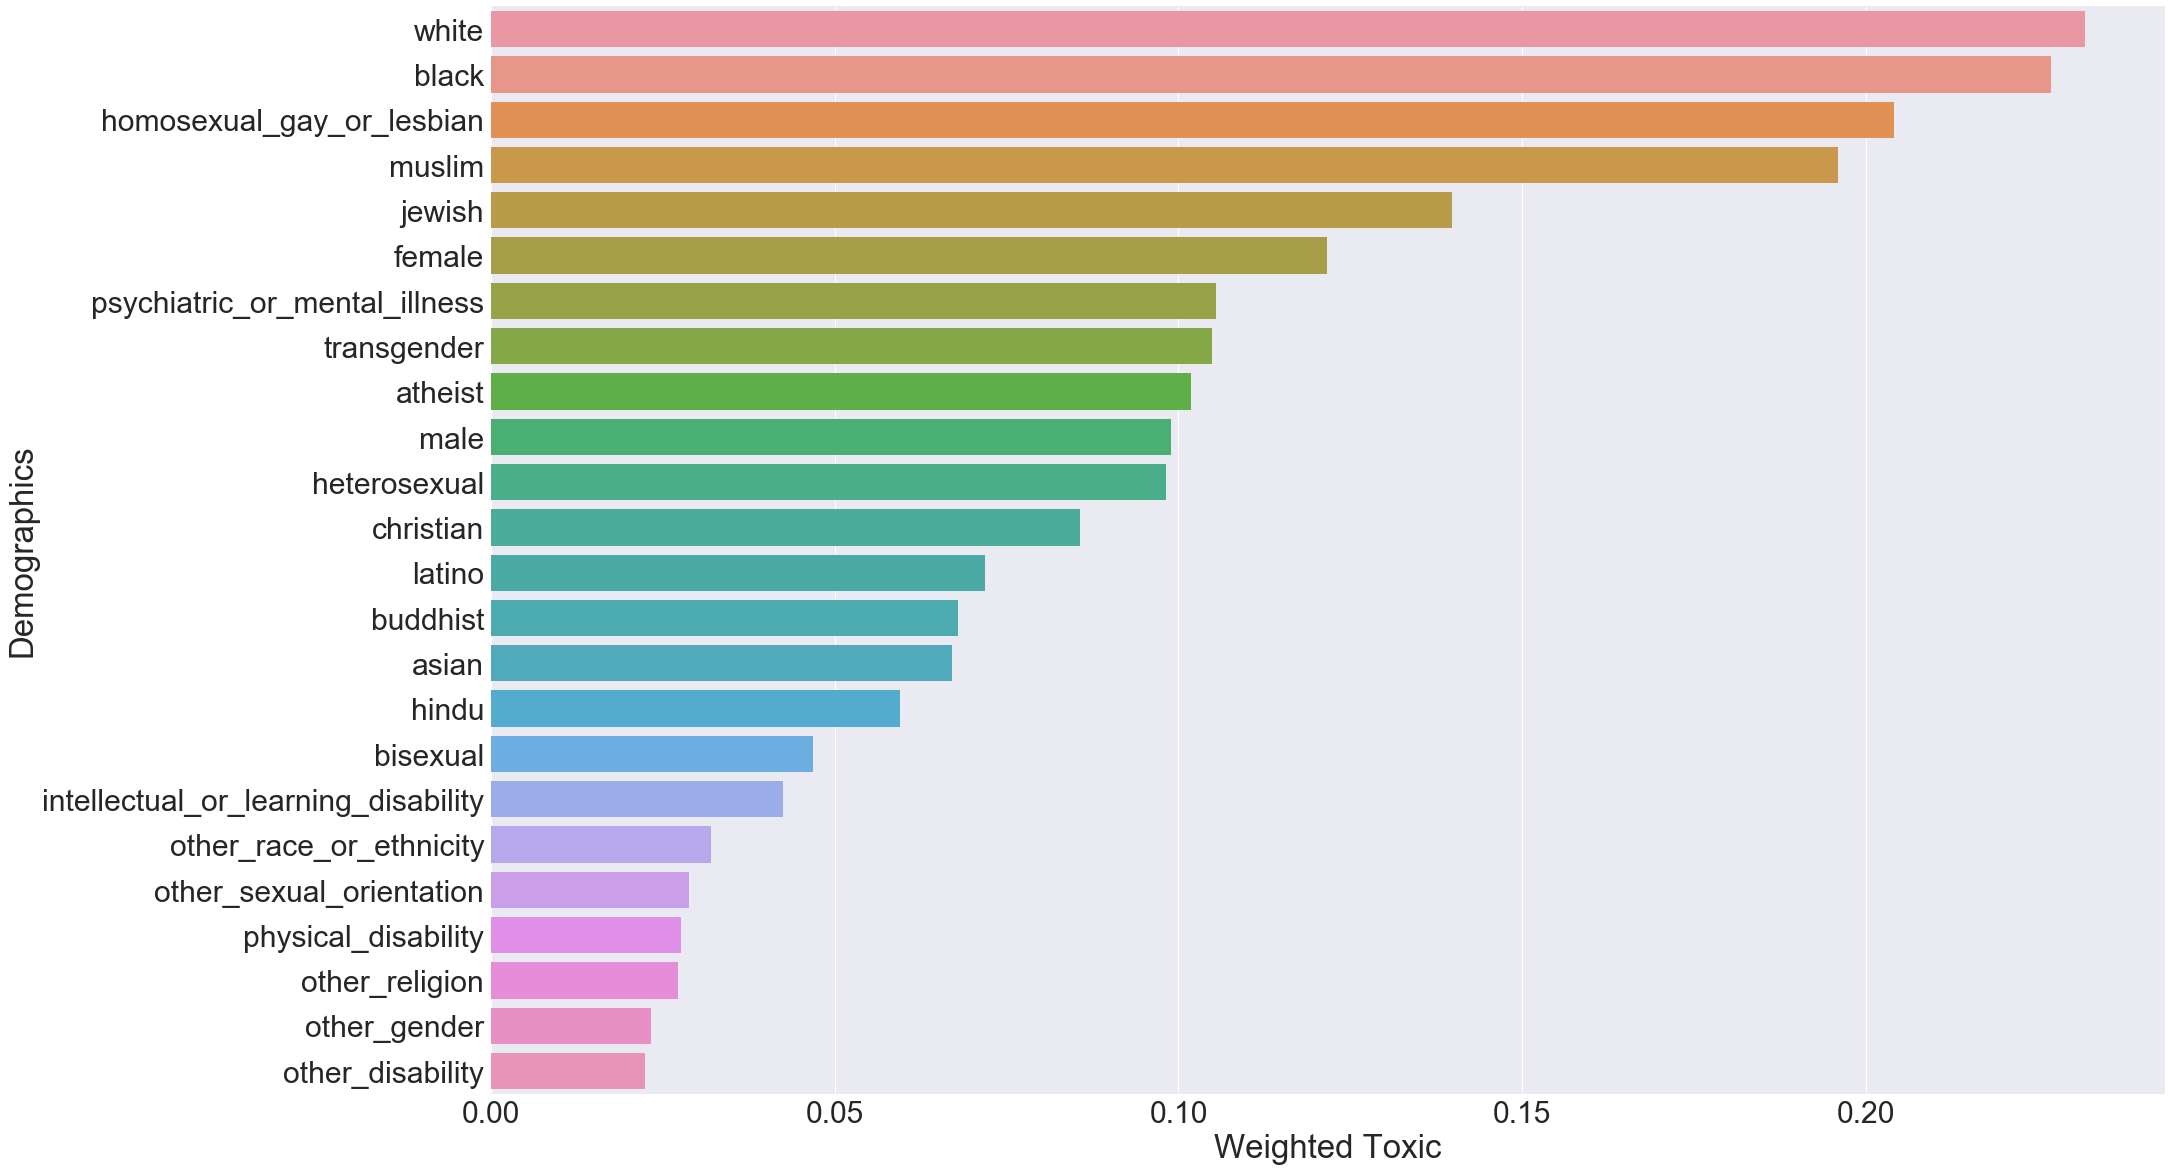

In [139]:
demographics = train.loc[:, ['target']+list(train)[slice(8,32)]].dropna()
weighted_toxic = demographics.iloc[:, 1:].multiply(demographics.iloc[:, 0],
        axis="index").sum()/demographics.iloc[:, 1:][demographics.iloc[:, 1:]>0].count()
weighted_toxic = weighted_toxic.sort_values(ascending=False)
plt.figure(figsize=(30,20))
sns.set(font_scale=3)
ax = sns.barplot(x = weighted_toxic.values, y = weighted_toxic.index)
plt.ylabel('Demographics')
plt.xlabel('Weighted Toxic')
plt.show()

##  III. Correlations: Toxicity Measures, Text Characteristics, and Identities

### 1. Identities vs. Various Toxicity Metrics

In [144]:
identities = tuple(train.iloc[:, 8:32])
rows = [{c:train[f].corr(train[c]) for c in columns} for f in identities]
poptoxicity_correlations = pd.DataFrame(rows, index=identities)

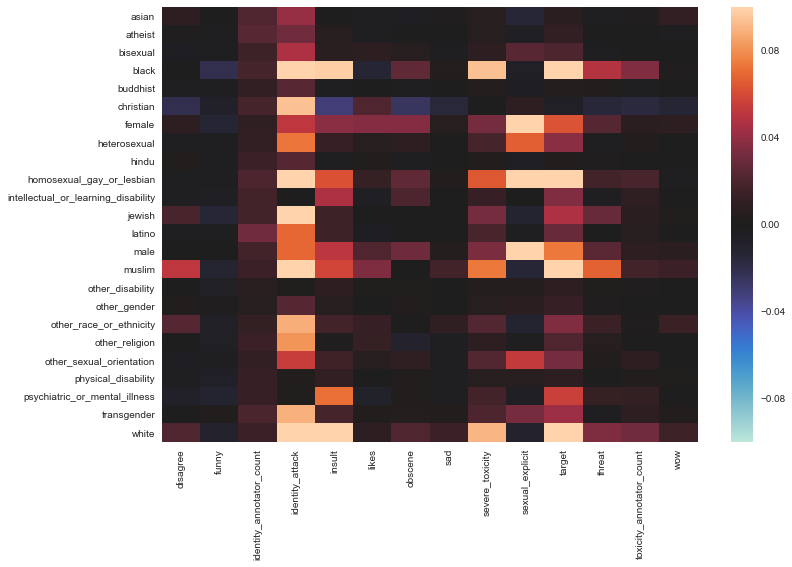

In [145]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1)
ax = sns.heatmap(poptoxicity_correlations, vmin=-0.1, vmax=0.1, center=0.0)

### 2.  Text Characteristics vs. Various Toxicity Metrics

In [146]:
features = ('total_length', 'capitals', 'caps_ratio', 'num_exclamation_marks',
            'num_question_marks', 'num_punctuation', 'num_words', 'num_unique_words',
            'unique_ratio', 'num_smilies', 'num_symbols', 'proper_n')
columns = ('target', 'severe_toxicity', 'obscene', 'identity_attack',
           'insult', 'threat', 'funny', 'wow', 'sad', 'likes', 'disagree',
           'sexual_explicit','identity_annotator_count', 'toxicity_annotator_count')
rows = [{c:train[f].corr(train[c]) for c in columns} for f in features]
train_correlations = pd.DataFrame(rows, index=features)

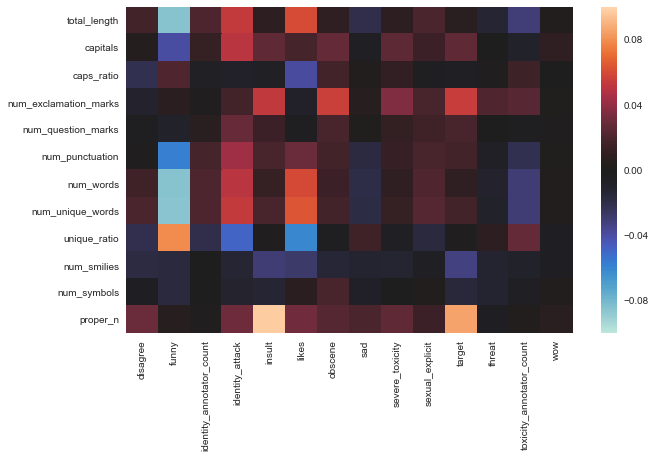

In [148]:
plt.figure(figsize=(10, 6))
#sns.set(font_scale=1)
ax = sns.heatmap(train_correlations, vmin=-0.1, vmax=0.1, center=0.0)

# IV. Toxicity: Trends over Time

In [124]:
withdate = train.loc[:, ['created_date', 'target']+list(train)[slice(8,32)]].dropna()
raceweighted = withdate.iloc[:, 2:]/withdate.iloc[:, 2:].sum()
race_target_weighted = raceweighted.multiply(withdate.iloc[:, 1], axis="index")
race_target_weighted['created_date'] = pd.to_datetime(withdate['created_date']).values.astype('datetime64[M]')
weighted_demo = race_target_weighted.groupby(['created_date']).sum().sort_index()

### 1. Toxicity and Race

In [125]:
import plotly
import plotly.plotly as py
import cufflinks as cf
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='13217', api_key='FG6itEaCMouvPJVR7DlI')
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [126]:
weighted_demo[['white', 'asian', 'black', 'latino',
               'other_race_or_ethnicity']].iplot(title = 'Time Series Toxicity & Race',
                                                 filename='Time Series Toxicity & Race' )

### 2. Toxicity and Religion

In [149]:
 weighted_demo[['atheist', 'jewish', 'buddhist', 'christian',
'hindu', 'muslim','other_religion']].iplot(title = 'Time Series Toxicity & Religion',
                                           filename='Time Series Toxicity & Religion')

### 3. Toxicity and Sexual Orientation

In [150]:
weighted_demo[['heterosexual', 'homosexual_gay_or_lesbian', 'bisexual',
 'other_sexual_orientation']].iplot(title = 'Time Series Toxicity & Sexual Orientation',
          filename='Time Series Toxicity & Sexual Orientation')


### 3. Toxicity and Disabilities

In [162]:
weighted_demo[['physical_disability', 'intellectual_or_learning_disability',
   'psychiatric_or_mental_illness', 'other_disability']].iplot(title = 'Time Series Toxicity & Disability', filename='Time Series Toxicity & Disability')
